<a href="https://colab.research.google.com/github/KyriakiGeorgiou/KyriakiGeorgiou/blob/main/CIFAR_100_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.Import Libraries

In [ ]:
# importing of modules for CIFAR-100 CNN 
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop, Adadelta
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [ ]:
#training constants
BATCH_SIZE = 64
N_EPOCH = 50 # use 20 for best initial results
N_CLASSES = 100
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop(learning_rate=0.0001, decay=1e-6)
# OPTIM = SGD(learning_rate= 0.0001)

print('Main variables initialised.')

Main variables initialised.


In [ ]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


#1. Load Dataset

In [ ]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 
# # convert to categorical
# Y_train = utils.to_categorical(y_train, N_CLASSES)
# Y_test = utils.to_categorical(y_test, N_CLASSES) 

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255



169001437/169001437 [==============================] - 3s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
from keras.utils import np_utils
# one-hot encoding using keras numpy utilities

print("Shape before one-hot encoding:", y_train)
y_train = np_utils.to_categorical(y_train,N_CLASSES)
y_test = np_utils.to_categorical(y_test,N_CLASSES)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding: [[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]
Shape after one-hot encoding:  (50000, 100)


## 1.1 Visualize dataset

In [ ]:
import pickle

# Load the meta file
with open('/content/meta', 'rb') as f:
    meta = pickle.load(f, encoding='bytes')

# Extract the class names
fine_label_names = meta[b'fine_label_names']
coarse_label_names = meta[b'coarse_label_names']

# Print the class names
print('Fine-grained class names:')
for i, name in enumerate(fine_label_names):
    print(f'{i}: {name.decode()}')

print('Coarse-grained class names:')
for i, name in enumerate(coarse_label_names):
    print(f'{i}: {name.decode()}')

Fine-grained class names:
0: apple
1: aquarium_fish
2: baby
3: bear
4: beaver
5: bed
6: bee
7: beetle
8: bicycle
9: bottle
10: bowl
11: boy
12: bridge
13: bus
14: butterfly
15: camel
16: can
17: castle
18: caterpillar
19: cattle
20: chair
21: chimpanzee
22: clock
23: cloud
24: cockroach
25: couch
26: crab
27: crocodile
28: cup
29: dinosaur
30: dolphin
31: elephant
32: flatfish
33: forest
34: fox
35: girl
36: hamster
37: house
38: kangaroo
39: keyboard
40: lamp
41: lawn_mower
42: leopard
43: lion
44: lizard
45: lobster
46: man
47: maple_tree
48: motorcycle
49: mountain
50: mouse
51: mushroom
52: oak_tree
53: orange
54: orchid
55: otter
56: palm_tree
57: pear
58: pickup_truck
59: pine_tree
60: plain
61: plate
62: poppy
63: porcupine
64: possum
65: rabbit
66: raccoon
67: ray
68: road
69: rocket
70: rose
71: sea
72: seal
73: shark
74: shrew
75: skunk
76: skyscraper
77: snail
78: snake
79: spider
80: squirrel
81: streetcar
82: sunflower
83: sweet_pepper
84: table
85: tank
86: telephone
87: 

<ipython-input-7-96412a860ccd>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)


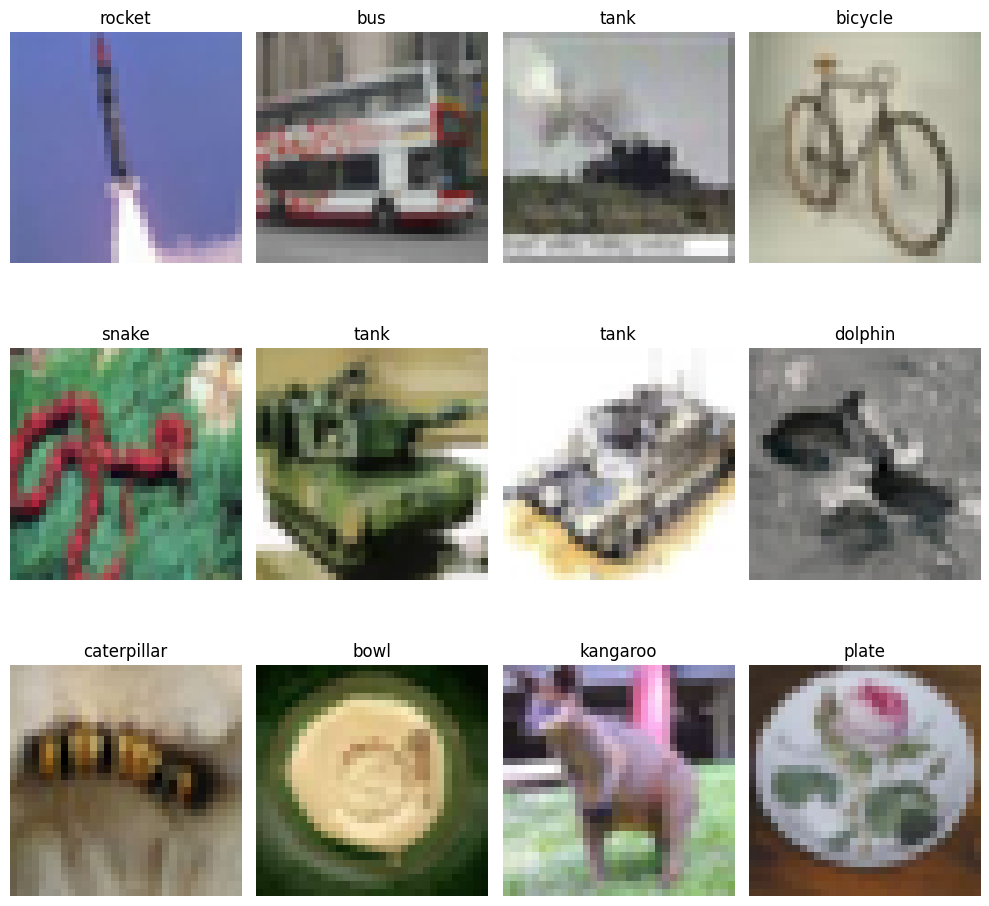

In [ ]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        k = np.random.randint(0, data.shape[0])
        plt.subplot(3, 4, i+1)
        plt.title(fine_label_names[np.argmax(labels[k])].decode())
        plt.imshow(data[k])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_samples(X_train, y_train)


39


Text(0.5, 1.0, 'Image 0 \n Class: keyboard')

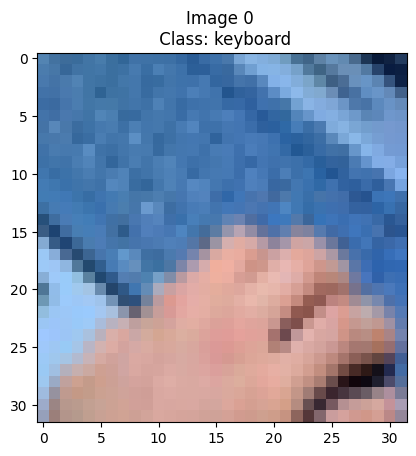

In [ ]:
image = X_train[10]
label = np.argmax(y_train[10])
print(label)
# print("Coarse Labels:", set(X_train['coarse_labels']))

plt.imshow(image)
plt.title("Image 0 \n Class: {}".format(fine_label_names[label].decode())) 

## 1.2 Build CNN

In [ ]:
# Building CNN

# Create the model
model = Sequential()

model.add(Conv2D(128, (3, 3), padding='same',
        input_shape= X_train.shape[1:]))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))
# model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))
# model.add(Conv2D(16,
#                  kernel_size=(3, 3),
#                  activation='selu',
#                  input_shape=(32,32,3)))
# model.add(BatchNormalization())

# model.add(Conv2D(32,
#                  kernel_size=(3, 3),
#                  activation='selu',
#                  padding = 'same',
#                  kernel_regularizer = 'l2'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Conv2D(64,
#                  kernel_size=(5, 5),
#                  activation='relu',
#                  kernel_regularizer = 'l2'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(128,
#                  kernel_size=(5, 5),
#                  activation='relu',
#                  padding = 'same'))
# model.add(BatchNormalization())
# model.add(AveragePooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# # model.add(Dense(256,activation = 'selu'))

# model.add(BatchNormalization())


# #softmax classifier
# model.add(Dense(N_CLASSES,
#                 activation='softmax',
#                 kernel_regularizer = 'l2'))


#compiling the sequential model
model.compile(loss = 'categorical_crossentropy',
              metrics=['accuracy'],
              optimizer = OPTIM)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 activation (Activation)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 128)       147584    
                                                                 
 activation_1 (Activation)   (None, 30, 30, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 256)       295168    
                                                        

In [ ]:
# training model for 10 epochs
history = model.fit(X_train,
                    y_train,
                    batch_size = BATCH_SIZE,
                    epochs = N_EPOCH,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT
                    )
                    
#callbacks= EarlyStopping(monitor= 'loss', mode = 'min', patience = 10)

Epoch 1/50
625/625 [==============================] - 12s 17ms/step - loss: 3.6885 - accuracy: 0.1487 - val_loss: 3.2566 - val_accuracy: 0.2164
Epoch 2/50
625/625 [==============================] - 10s 16ms/step - loss: 2.9475 - accuracy: 0.2819 - val_loss: 2.8693 - val_accuracy: 0.2975
Epoch 3/50
625/625 [==============================] - 10s 16ms/step - loss: 2.4786 - accuracy: 0.3741 - val_loss: 2.5706 - val_accuracy: 0.3606
Epoch 4/50
625/625 [==============================] - 10s 15ms/step - loss: 2.0865 - accuracy: 0.4625 - val_loss: 2.4290 - val_accuracy: 0.3996
Epoch 5/50
625/625 [==============================] - 10s 15ms/step - loss: 1.7191 - accuracy: 0.5454 - val_loss: 2.3755 - val_accuracy: 0.4161
Epoch 6/50
625/625 [==============================] - 10s 16ms/step - loss: 1.3483 - accuracy: 0.6345 - val_loss: 2.4580 - val_accuracy: 0.4232
Epoch 7/50
625/625 [==============================] - 10s 16ms/step - loss: 0.9763 - accuracy: 0.7277 - val_loss: 2.5677 - val_accuracy:

157/157 [==============================] - 1s 6ms/step - loss: 8.1061 - accuracy: 0.4328

Test score/loss: 8.106127738952637
Test accuracy: 0.4327999949455261
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


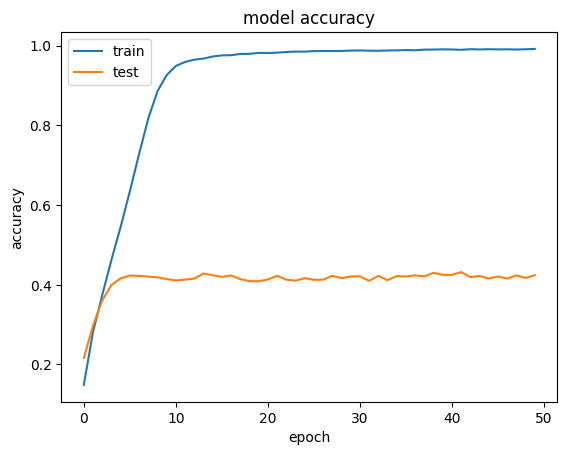

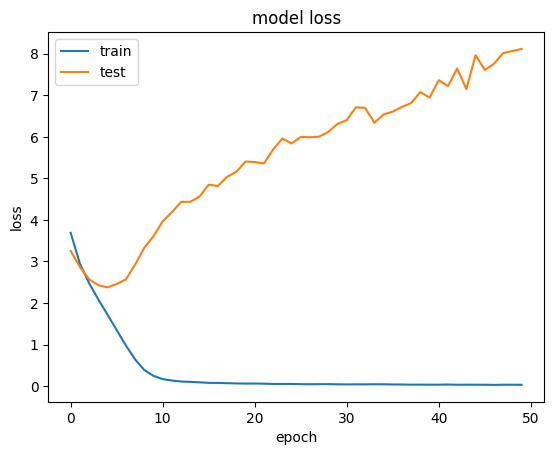

In [ ]:
#Testing
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 1.3 Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


Augmenting training set images...


In [ ]:

#fit the dataset
datagen.fit(X_train)


# train by fitting the model on batches with real-time data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                              steps_per_epoch=X_train.shape[0]//BATCH_SIZE,
                              epochs=N_EPOCH,
                              verbose=VERBOSE)



Epoch 1/50
781/781 [==============================] - 42s 41ms/step - loss: 3.7105 - accuracy: 0.1438
Epoch 2/50
781/781 [==============================] - 31s 40ms/step - loss: 3.0416 - accuracy: 0.2631
Epoch 3/50
781/781 [==============================] - 31s 40ms/step - loss: 2.6758 - accuracy: 0.3340
Epoch 4/50
781/781 [==============================] - 31s 39ms/step - loss: 2.4309 - accuracy: 0.3860
Epoch 5/50
781/781 [==============================] - 31s 40ms/step - loss: 2.2382 - accuracy: 0.4252
Epoch 6/50
781/781 [==============================] - 31s 40ms/step - loss: 2.0700 - accuracy: 0.4593
Epoch 7/50
781/781 [==============================] - 31s 40ms/step - loss: 1.9297 - accuracy: 0.4909
Epoch 8/50
781/781 [==============================] - 32s 42ms/step - loss: 1.8108 - accuracy: 0.5167
Epoch 9/50
781/781 [==============================] - 31s 40ms/step - loss: 1.6913 - accuracy: 0.5448
Epoch 10/50
781/781 [==============================] - 32s 40ms/step - loss: 1.594

In [ ]:
#save model in json format into a file
model_json = model.to_json()
open('cifar100_architecture.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar100_weights.h5', overwrite=True)

print('Files saved for model definition and for weights.')


Files saved for model definition and for weights.


## 1.4 Visualize Results

157/157 [==============================] - 1s 6ms/step - loss: 2.9207 - accuracy: 0.5726

Test score/loss: 2.9207282066345215
Test accuracy: 0.5726000070571899
dict_keys(['loss', 'accuracy'])


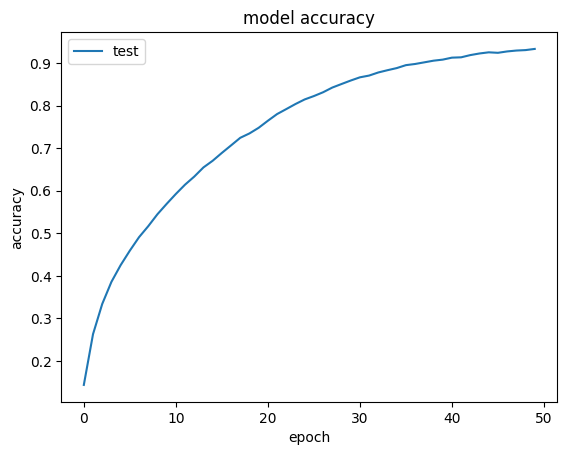

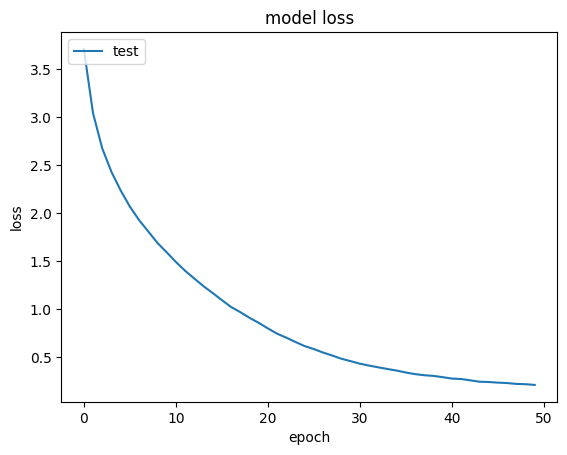

In [ ]:
#Testing
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend([ 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend([ 'test'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 3ms/step


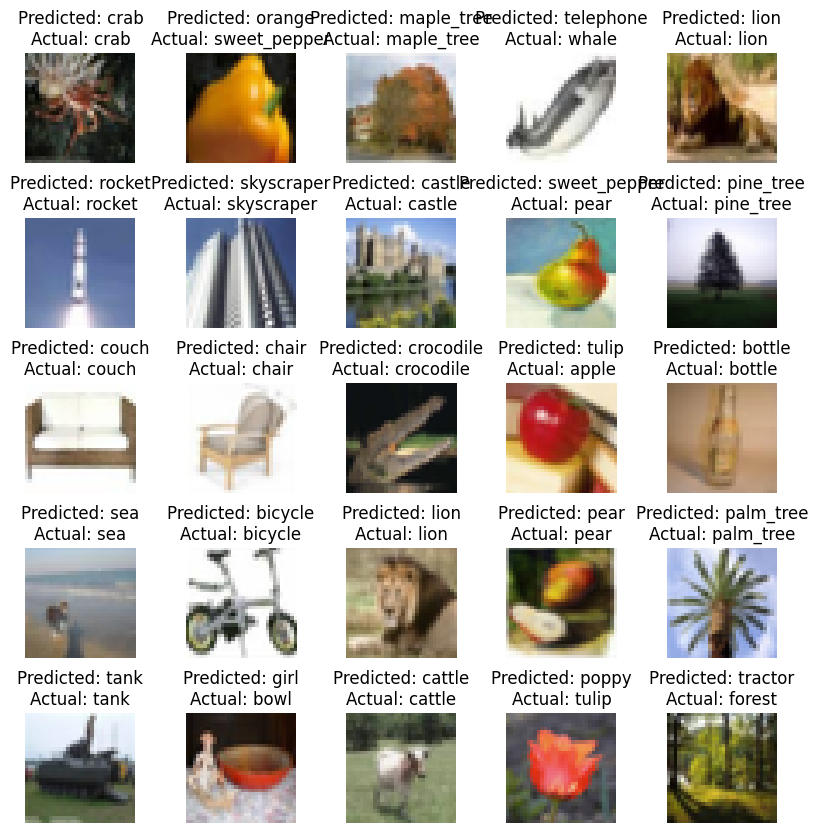

In [ ]:
# get the predicted labels for the test set
y_pred = model.predict(X_test)

# print the images with their predicted label
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes.flatten(), start=100):
    predicted_class = fine_label_names[np.argmax(y_pred[i])].decode()
    actual_class = fine_label_names[np.argmax(y_test[i])].decode()
    ax.imshow(X_test[i])
    ax.axis('off')
    ax.set_title("Predicted: {}\nActual: {}".format(predicted_class, actual_class))

# add space between the images in the horizontal axis
fig.subplots_adjust(hspace=0.5)


## 1.5 Visualizing Unknown Image

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json
from PIL import Image

#load the saved model from JSON file
with open('/content/cifar100_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)

# load the saved weights into the model
model.load_weights('/content/cifar100_weights.h5')

# load the image 
img = Image.open('/content/lion.png')


# resize the image to the same size as the CIFAR-100 dataset
img = img.resize((32, 32))

# convert the image to a numpy array
img_arr = np.array(img)

# add a batch size dimension to the image
img_arr = np.expand_dims(img_arr, axis=0)

# preprocess the image to match the input format of the model
img_arr = img_arr.astype('float32')
img_arr /= 255.0

# make a prediction using the loaded model
prediction = model.predict(img_arr)
predicted_label = fine_label_names[np.argmax(prediction)].decode()

print(np.argmax(prediction))
predicted_label = fine_label_names[np.argmax(prediction)].decode()

# print the predicted label
print("Predicted label:", predicted_label)

# plot the image and show it
plt.imshow(img_arr[0])
plt.show()

FileNotFoundError: ignored

In [ ]:
# get the top 5 probabilities and corresponding labels
probs = list(prediction[0])
top_labels = [fine_label_names[i].decode() for i in np.argsort(prediction[0])[::-1][:5]]
top_probs = [probs[i] for i in np.argsort(prediction[0])[::-1][:5]]

# create a bar chart of the top 5 probabilities
plt.bar([predicted_label]+top_labels[1:], [np.max(prediction)]+top_probs[1:])
plt.title("Top 5 Predicted Labels")
plt.xlabel("Label")
plt.ylabel("Probability")
plt.show()


In [ ]:
from tabulate import tabulate

# make predictions on test set
y_pred = model.predict(X_test,
                       batch_size= BATCH_SIZE,
                      verbose=VERBOSE,
                       )

# get predicted labels for each image
y_pred_labels = np.argmax(y_pred, axis=1)

# convert one-hot encoded y_test to class labels
y_test_labels = np.argmax(y_test, axis=1)

# calculate accuracy for each class
class_accuracy = []
for i in range(N_CLASSES):
    # get indices of test set images with this class label
    class_indices = np.where(y_test_labels == i)[0]
    # count how many of those images were predicted correctly
    correct_predictions = np.sum(y_pred_labels[class_indices] == i)
    # calculate accuracy for this class
    accuracy = correct_predictions / len(class_indices) * 100
    class_accuracy.append((i, fine_label_names[i].decode(), accuracy))

# sort accuracy by class index
class_accuracy = sorted(class_accuracy, key=lambda x: x[0])

# print table
headers = ["Class Index", "Class Name", "Accuracy/%"]
table = tabulate(class_accuracy, headers=headers, tablefmt="grid")
print(table)


157/157 [==============================] - 1s 6ms/step
+---------------+---------------+--------------+
|   Class Index | Class Name    |   Accuracy/% |
+===============+===============+==============+
|             0 | apple         |           70 |
+---------------+---------------+--------------+
|             1 | aquarium_fish |           70 |
+---------------+---------------+--------------+
|             2 | baby          |           36 |
+---------------+---------------+--------------+
|             3 | bear          |           33 |
+---------------+---------------+--------------+
|             4 | beaver        |           48 |
+---------------+---------------+--------------+
|             5 | bed           |           55 |
+---------------+---------------+--------------+
|             6 | bee           |           82 |
+---------------+---------------+--------------+
|             7 | beetle        |           65 |
+---------------+---------------+--------------+
|             